<div style='background: #e1ff00'> <h1>Student Information</h1>  
    
Name: Miss Pattamon Rattanapan

Student ID: 108065436

GitHub ID: https://github.com/mon826

Kaggle name:Username : mon826 (display name TheRicky, account ID 2514034)

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import os
import math
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import tensorflow as tf
#import tensorflow_datasets as tfds
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
import helpers.data_mining_helpers as dmh

2.0.0


In [45]:
#Import prepared dataset

traindf = pd.read_csv(r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Export dataset for kaggle\traindf.csv')

testdf = pd.read_csv(r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Export dataset for kaggle\testdf.csv')
testdf['emotion'] = testdf.apply(lambda _: '', axis=1)

# Data Preparation

In [16]:
import json
data = []
with open(r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Data for Lab2_HW\tweets_DM.json', errors='ignore') as f:
    for line in f:
        data.append(json.loads(line))

In [17]:
#Print the import data to see how it looks like
data


[{'_score': 391,
  '_index': 'hashtag_tweets',
  '_source': {'tweet': {'hashtags': ['Snapchat'],
    'tweet_id': '0x376b20',
    'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}},
  '_crawldate': '2015-05-23 11:42:47',
  '_type': 'tweets'},
 {'_score': 433,
  '_index': 'hashtag_tweets',
  '_source': {'tweet': {'hashtags': ['freepress', 'TrumpLegacy', 'CNN'],
    'tweet_id': '0x2d5350',
    'text': '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN'}},
  '_crawldate': '2016-01-28 04:52:09',
  '_type': 'tweets'},
 {'_score': 232,
  '_index': 'hashtag_tweets',
  '_source': {'tweet': {'hashtags': ['bibleverse'],
    'tweet_id': '0x28b412',
    'text': 'Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>'}},
  '_crawldate': '2017-12-25 04:39:20',
  '_type': 'tweets'},
 {'_score': 376,
  '_index': 'hashtag_

In [18]:
#Then print out the data as list to see
data[1]


{'_score': 433,
 '_index': 'hashtag_tweets',
 '_source': {'tweet': {'hashtags': ['freepress', 'TrumpLegacy', 'CNN'],
   'tweet_id': '0x2d5350',
   'text': '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN'}},
 '_crawldate': '2016-01-28 04:52:09',
 '_type': 'tweets'}

In [19]:
#  Put it in pandas dataframe
#pass the data into panda dataframe
ddata = pd.DataFrame(data)
ddata


,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets
...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets


In [20]:
#Then add the new column to the dataframe by bringing the data from its' list

ddata['id'] = ddata['_source'].apply(lambda x: x['tweet']['tweet_id'])
ddata['hashtag'] = ddata['_source'].apply(lambda x: x['tweet']['hashtags'])
ddata['text'] = ddata['_source'].apply(lambda x: x['tweet']['text'])
ddata


,_score,_index,_source,_crawldate,_type,id,hashtag,text
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,0x2de201,[],"""Trust is not the same as faith. A friend is s..."
...,...,...,...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,0x316b80,"[mixedfeeling, butimTHATperson]",When you buy the last 2 tickets remaining for ...
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,0x29d0cb,[],I swear all this hard work gone pay off one da...
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets,0x2a6a4f,[],@Parcel2Go no card left when I wasn't in so I ...
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,0x24faed,[],"Ah, corporate life, where you can date <LH> us..."


In [21]:
#  Split the column and rearrange
#Split the colum _crawldate to two separate columns which are date and time

ddata[['date','time']] = ddata._crawldate.str.split(' ',expand=True)

#Then we print to see how the data look like
ddata


,_score,_index,_source,_crawldate,_type,id,hashtag,text,date,time
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",2015-05-23,11:42:47
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",2016-01-28,04:52:09
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k...",2017-12-25,04:39:20
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,2016-01-24,23:53:05
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,0x2de201,[],"""Trust is not the same as faith. A friend is s...",2016-01-08,17:18:59
...,...,...,...,...,...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,0x316b80,"[mixedfeeling, butimTHATperson]",When you buy the last 2 tickets remaining for ...,2015-05-12,12:51:52
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,0x29d0cb,[],I swear all this hard work gone pay off one da...,2017-10-02,17:54:04
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets,0x2a6a4f,[],@Parcel2Go no card left when I wasn't in so I ...,2016-10-10,11:04:32
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,0x24faed,[],"Ah, corporate life, where you can date <LH> us...",2016-09-02,14:25:06


In [22]:
#delete the column

ddata.drop(columns = '_index',inplace = True)
ddata.drop(columns = '_source',inplace = True)
ddata.drop(columns = '_type',inplace = True)
ddata


,_score,_crawldate,id,hashtag,text,date,time
0,391,2015-05-23 11:42:47,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",2015-05-23,11:42:47
1,433,2016-01-28 04:52:09,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",2016-01-28,04:52:09
2,232,2017-12-25 04:39:20,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k...",2017-12-25,04:39:20
3,376,2016-01-24 23:53:05,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,2016-01-24,23:53:05
4,989,2016-01-08 17:18:59,0x2de201,[],"""Trust is not the same as faith. A friend is s...",2016-01-08,17:18:59
...,...,...,...,...,...,...,...
1867530,827,2015-05-12 12:51:52,0x316b80,"[mixedfeeling, butimTHATperson]",When you buy the last 2 tickets remaining for ...,2015-05-12,12:51:52
1867531,368,2017-10-02 17:54:04,0x29d0cb,[],I swear all this hard work gone pay off one da...,2017-10-02,17:54:04
1867532,498,2016-10-10 11:04:32,0x2a6a4f,[],@Parcel2Go no card left when I wasn't in so I ...,2016-10-10,11:04:32
1867533,840,2016-09-02 14:25:06,0x24faed,[],"Ah, corporate life, where you can date <LH> us...",2016-09-02,14:25:06


In [23]:
#Rename the column to be easier to read and print the data to see 
#but the date and time is stored under the same column and the source is starting with {'tweet'{hastags'

ddata.rename(columns={'_crawldate':'date&time'}, inplace = True)
ddata.rename(columns={'_score':'score'}, inplace = True)
ddata


,score,date&time,id,hashtag,text,date,time
0,391,2015-05-23 11:42:47,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",2015-05-23,11:42:47
1,433,2016-01-28 04:52:09,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",2016-01-28,04:52:09
2,232,2017-12-25 04:39:20,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k...",2017-12-25,04:39:20
3,376,2016-01-24 23:53:05,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,2016-01-24,23:53:05
4,989,2016-01-08 17:18:59,0x2de201,[],"""Trust is not the same as faith. A friend is s...",2016-01-08,17:18:59
...,...,...,...,...,...,...,...
1867530,827,2015-05-12 12:51:52,0x316b80,"[mixedfeeling, butimTHATperson]",When you buy the last 2 tickets remaining for ...,2015-05-12,12:51:52
1867531,368,2017-10-02 17:54:04,0x29d0cb,[],I swear all this hard work gone pay off one da...,2017-10-02,17:54:04
1867532,498,2016-10-10 11:04:32,0x2a6a4f,[],@Parcel2Go no card left when I wasn't in so I ...,2016-10-10,11:04:32
1867533,840,2016-09-02 14:25:06,0x24faed,[],"Ah, corporate life, where you can date <LH> us...",2016-09-02,14:25:06


In [24]:
#Rearrange the columns and print it to see how it looks like

ddata = ddata[['id','score','hashtag','text','date&time','date','time']]

#Finally get the data which is ready to use 
ddata


,id,score,hashtag,text,date&time,date,time
0,0x376b20,391,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",2015-05-23 11:42:47,2015-05-23,11:42:47
1,0x2d5350,433,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",2016-01-28 04:52:09,2016-01-28,04:52:09
2,0x28b412,232,[bibleverse],"Confident of your obedience, I write to you, k...",2017-12-25 04:39:20,2017-12-25,04:39:20
3,0x1cd5b0,376,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,2016-01-24 23:53:05,2016-01-24,23:53:05
4,0x2de201,989,[],"""Trust is not the same as faith. A friend is s...",2016-01-08 17:18:59,2016-01-08,17:18:59
...,...,...,...,...,...,...,...
1867530,0x316b80,827,"[mixedfeeling, butimTHATperson]",When you buy the last 2 tickets remaining for ...,2015-05-12 12:51:52,2015-05-12,12:51:52
1867531,0x29d0cb,368,[],I swear all this hard work gone pay off one da...,2017-10-02 17:54:04,2017-10-02,17:54:04
1867532,0x2a6a4f,498,[],@Parcel2Go no card left when I wasn't in so I ...,2016-10-10 11:04:32,2016-10-10,11:04:32
1867533,0x24faed,840,[],"Ah, corporate life, where you can date <LH> us...",2016-09-02 14:25:06,2016-09-02,14:25:06


#### Data Preparation

In [26]:
#Import the file data identification by using pandas

col_Names2=["id", "identification"]
dfid = pd.read_csv(r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Data for Lab2_HW\data_identification.csv',
                      names =col_Names2, header =0)
dfid


,id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [28]:
#Import the file emotion by using pandas

col_Names=["id", "emotion"]
emotion = pd.read_csv(r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Data for Lab2_HW\emotion.csv', header = 0, names =col_Names)
emotion


,id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [29]:
#Merge the ddate and emotion dataframe together 
#>>https://stackoverflow.com/questions/21435176/appending-two-dataframes-with-same-columns-different-order
#But it's wrong it's vertically merged

totaldf = pd.concat([ddata, dfid], ignore_index=True, sort=True)
totaldf


,date,date&time,hashtag,id,identification,score,text,time
0,2015-05-23,2015-05-23 11:42:47,[Snapchat],0x376b20,NaN,391.0,"People who post ""add me on #Snapchat"" must be ...",11:42:47
1,2016-01-28,2016-01-28 04:52:09,"[freepress, TrumpLegacy, CNN]",0x2d5350,NaN,433.0,"@brianklaas As we see, Trump is dangerous to #...",04:52:09
2,2017-12-25,2017-12-25 04:39:20,[bibleverse],0x28b412,NaN,232.0,"Confident of your obedience, I write to you, k...",04:39:20
3,2016-01-24,2016-01-24 23:53:05,[],0x1cd5b0,NaN,376.0,Now ISSA is stalking Tasha 😂😂😂 <LH>,23:53:05
4,2016-01-08,2016-01-08 17:18:59,[],0x2de201,NaN,989.0,"""Trust is not the same as faith. A friend is s...",17:18:59
...,...,...,...,...,...,...,...,...
3735065,NaN,NaN,NaN,0x227e25,train,NaN,NaN,NaN
3735066,NaN,NaN,NaN,0x293813,train,NaN,NaN,NaN
3735067,NaN,NaN,NaN,0x1e1a7e,train,NaN,NaN,NaN
3735068,NaN,NaN,NaN,0x2156a5,train,NaN,NaN,NaN


In [30]:
#Try again, Ok it works 
#>> https://stackoverflow.com/questions/43297589/merge-two-data-frames-based-on-common-column-values-in-pandas


totaldf = pd.merge(ddata, dfid, on='id',sort = True)
totaldf


,id,score,hashtag,text,date&time,date,time,identification
0,0x1c7f0f,62,[],"@JZED74 While inappropriate AF, he likely wasn...",2017-05-14 11:39:43,2017-05-14,11:39:43,test
1,0x1c7f10,242,[BlackMirror],o m g Shut Up And Dance though #BlackMirror <LH>,2015-05-16 10:36:47,2015-05-16,10:36:47,train
2,0x1c7f11,915,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",On #twitch <LH> on the #Destinybeta #Destiny #...,2016-10-15 20:46:37,2016-10-15,20:46:37,train
3,0x1c7f12,756,[],I tried to figure out why you mean so much to ...,2016-02-14 15:55:45,2016-02-14,15:55:45,test
4,0x1c7f13,213,"[auspol, fizza]","The only “big plan” you ever had in your life,...",2016-07-25 17:05:35,2016-07-25,17:05:35,test
...,...,...,...,...,...,...,...,...
1867530,0x38fe19,77,"[WesHoolahan, WALvIRL, COYBIG]",Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,2015-02-01 18:04:28,2015-02-01,18:04:28,train
1867531,0x38fe1a,25,"[not, maga]",@mattmfm Fake news! <LH> propagated by Tumpkin...,2016-12-20 17:19:58,2016-12-20,17:19:58,train
1867532,0x38fe1b,611,[],I told myself I'd be twitter famous. twitter m...,2016-02-14 03:24:55,2016-02-14,03:24:55,test
1867533,0x38fe1c,639,[],..today was brutal ..#Hungover,2016-09-13 06:31:27,2016-09-13,06:31:27,train


# Train dataset 

In [31]:
#Then cut the file into 2 separate dataset by its identification
#Cut the file for training set first
'''
traindf = totaldf[totaldf['identification']=='train']
traindf
'''

,id,score,hashtag,text,date&time,date,time,identification
1,0x1c7f10,242,[BlackMirror],o m g Shut Up And Dance though #BlackMirror <LH>,2015-05-16 10:36:47,2015-05-16,10:36:47,train
2,0x1c7f11,915,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",On #twitch <LH> on the #Destinybeta #Destiny #...,2016-10-15 20:46:37,2016-10-15,20:46:37,train
5,0x1c7f14,939,[],A nice sunny wak this morning not many <LH> ar...,2016-07-04 07:22:56,2016-07-04,07:22:56,train
6,0x1c7f15,181,"[Confession, NationalCandyCornDay, CouldEatThe...",I'm one of those people who love candy corn......,2016-04-16 12:53:40,2016-04-16,12:53:40,train
7,0x1c7f16,970,[],@metmuseum What are these? They look like some...,2017-04-22 17:50:28,2017-04-22,17:50:28,train
...,...,...,...,...,...,...,...,...
1867529,0x38fe18,922,[],@LJPBR @FifthHarmony Um My vote For @FifthHar...,2016-12-06 11:10:57,2016-12-06,11:10:57,train
1867530,0x38fe19,77,"[WesHoolahan, WALvIRL, COYBIG]",Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,2015-02-01 18:04:28,2015-02-01,18:04:28,train
1867531,0x38fe1a,25,"[not, maga]",@mattmfm Fake news! <LH> propagated by Tumpkin...,2016-12-20 17:19:58,2016-12-20,17:19:58,train
1867533,0x38fe1c,639,[],..today was brutal ..#Hungover,2016-09-13 06:31:27,2016-09-13,06:31:27,train


In [32]:
#Then print its' basic info to see
'''
traindf.info()
'''

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455563 entries, 1 to 1867534
Data columns (total 8 columns):
id                1455563 non-null object
score             1455563 non-null int64
hashtag           1455563 non-null object
text              1455563 non-null object
date&time         1455563 non-null object
date              1455563 non-null object
time              1455563 non-null object
identification    1455563 non-null object
dtypes: int64(1), object(7)
memory usage: 99.9+ MB


In [44]:
#Then we can see that the number of row for the training data and the emotion (the result of prediction) is the same
#Then we combine those two file together
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
'''
traindf = pd.merge(traindf, emotion, on = None,sort = True)
traindf
'''

'\ntraindf = pd.merge(traindf, emotion, on = None,sort = True)\ntraindf\n'

In [43]:
#Remove stop words and convert to lower case
'''
def remove_stop(traindf):
    stop_words = set(stopwords.words('english')) 
    
    #Remove the punctuation
    #traindf = traindf.translate(str.maketrans('', '', string.punctuation)) 
    
    #convert to lowercase chracter
    #traindf = traindf.lower()
    word_tokens = word_tokenize(traindf) 

    filtered_traindf = [w for w in word_tokens if not w in stop_words] 
    filtered_traindf = ' '.join(filtered_traindf)
    return filtered_traindf
'''

"\ndef remove_stop(traindf):\n    stop_words = set(stopwords.words('english')) \n    \n    #Remove the punctuation\n    #traindf = traindf.translate(str.maketrans('', '', string.punctuation)) \n    \n    #convert to lowercase chracter\n    #traindf = traindf.lower()\n    word_tokens = word_tokenize(traindf) \n\n    filtered_traindf = [w for w in word_tokens if not w in stop_words] \n    filtered_traindf = ' '.join(filtered_traindf)\n    return filtered_traindf\n"

In [42]:
#Then add the remove stop words back to the dataframe
'''
traindf['filtered_traindf'] = traindf.text.apply(lambda x:remove_stop(x))
traindf
'''

"\ntraindf['filtered_traindf'] = traindf.text.apply(lambda x:remove_stop(x))\ntraindf\n"

In [0]:
#Remove the puntuation
'''
def punct(traindf):
    traindf = traindf.translate(str.maketrans('', '', string.punctuation)) 
 
    filtered_traindf2 = [w for w in word_tokens if not w in stop_words] 
    filtered_traindf2 = ' '.join(filtered2_traindf)
    return filtered_traindf2
    '''

In [0]:
#Then add the remove stop words back to the dataframe
'''
traindf['filtered_traindf2'] = traindf.text.apply(lambda x:remove_stop(x))
traindf
'''

In [0]:
'''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = traindf['emotion'].unique()
post_total = len(traindf)
df1 = traindf.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10,7))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()
'''

###  For easier processing, I prepare the file from my laptop then import to use 

In [3]:
traindf = pd.read_csv('traindf.csv')
# Dataset is now stored in a Pandas Dataframe

In [17]:
traindf

,id,score,hashtag,text,date&time,date,time,identification,emotion,filtered_traindf,filtered_traindf2
0,0x1c7f10,242,['BlackMirror'],o m g Shut Up And Dance though #BlackMirror <LH>,2015-05-16 10:36:47,2015-05-16,10:36:47,train,joy,g shut dance though # blackmirror < lh >,g shut dance though # blackmirror < lh >
1,0x1c7f11,915,"['twitch', 'Destinybeta', 'Destiny', 'Destiny2...",On #twitch <LH> on the #Destinybeta #Destiny #...,2016-10-15 20:46:37,2016-10-15,20:46:37,train,anticipation,# twitch < lh > # destinybeta # destiny # dest...,# twitch < lh > # destinybeta # destiny # dest...
2,0x1c7f14,939,[],A nice sunny wak this morning not many <LH> ar...,2016-07-04 07:22:56,2016-07-04,07:22:56,train,joy,"nice sunny wak morning many < lh > aroud , whi...","nice sunny wak morning many < lh > aroud , whi..."
3,0x1c7f15,181,"['Confession', 'NationalCandyCornDay', 'CouldE...",I'm one of those people who love candy corn......,2016-04-16 12:53:40,2016-04-16,12:53:40,train,joy,'m one people love candy corn ... lot . 😁😂 # c...,'m one people love candy corn ... lot . 😁😂 # c...
4,0x1c7f16,970,[],@metmuseum What are these? They look like some...,2017-04-22 17:50:28,2017-04-22,17:50:28,train,disgust,@ metmuseum ? look like something toddlers mak...,@ metmuseum ? look like something toddlers mak...
...,...,...,...,...,...,...,...,...,...,...,...
1455558,0x38fe18,922,[],@LJPBR @FifthHarmony Um My vote For @FifthHar...,2016-12-06 11:10:57,2016-12-06,11:10:57,train,sadness,@ ljpbr @ fifthharmony um vote @ fifthharmony ...,@ ljpbr @ fifthharmony um vote @ fifthharmony ...
1455559,0x38fe19,77,"['WesHoolahan', 'WALvIRL', 'COYBIG']",Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,2015-02-01 18:04:28,2015-02-01,18:04:28,train,anticipation,# weshoolahan ? ! # walvirl # coybig < lh >,# weshoolahan ? ! # walvirl # coybig < lh >
1455560,0x38fe1a,25,"['not', 'maga']",@mattmfm Fake news! <LH> propagated by Tumpkin...,2016-12-20 17:19:58,2016-12-20,17:19:58,train,surprise,@ mattmfm fake news ! < lh > propagated tumpki...,@ mattmfm fake news ! < lh > propagated tumpki...
1455561,0x38fe1c,639,[],..today was brutal ..#Hungover,2016-09-13 06:31:27,2016-09-13,06:31:27,train,disgust,..today brutal .. # hungover,..today brutal .. # hungover


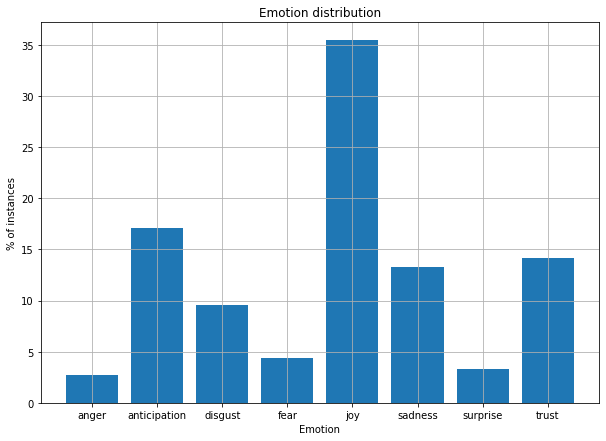

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = traindf['emotion'].unique()
post_total = len(traindf)
traindf = traindf.groupby(['emotion']).count()['text']
traindf = traindf.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10,7))
plt.bar(traindf.index,traindf.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

# Test dataset 

In [8]:
#Then cut the file for testing dataset
'''
testdf = totaldf[totaldf['identification']=='test']
testdf
'''

"\ntestdf = totaldf[totaldf['identification']=='test']\ntestdf\n"

In [9]:
'''
testdf['emotion'] = testdf.apply(lambda _: '', axis=1)
'''

"\ntestdf['emotion'] = testdf.apply(lambda _: '', axis=1)\n"

In [10]:
#Then print its' basic info to see
'''
testdf.info()
'''

'\ntestdf.info()\n'

###  For easier processing, I prepare the file from my laptop then import to use 

In [4]:
testdf = pd.read_csv('testdf.csv')
# Dataset is now stored in a Pandas Dataframe

In [5]:
testdf['emotion'] = testdf.apply(lambda _: '', axis=1)

In [5]:
#Then print its' basic info to see
testdf.info()

testdf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411972 entries, 0 to 411971
Data columns (total 9 columns):
id                411972 non-null object
score             411972 non-null int64
hashtag           411972 non-null object
text              411972 non-null object
date&time         411972 non-null object
date              411972 non-null object
time              411972 non-null object
identification    411972 non-null object
emotion           411972 non-null object
dtypes: int64(1), object(8)
memory usage: 28.3+ MB


,id,score,hashtag,text,date&time,date,time,identification,emotion
0,0x1c7f0f,62,[],"@JZED74 While inappropriate AF, he likely wasn...",2017-05-14 11:39:43,2017-05-14,11:39:43,test,
1,0x1c7f12,756,[],I tried to figure out why you mean so much to ...,2016-02-14 15:55:45,2016-02-14,15:55:45,test,
2,0x1c7f13,213,"['auspol', 'fizza']","The only “big plan” you ever had in your life,...",2016-07-25 17:05:35,2016-07-25,17:05:35,test,
3,0x1c7f17,603,[],"Looking back on situations old & new, recent o...",2017-01-21 19:25:33,2017-01-21,19:25:33,test,
4,0x1c7f18,609,[],@jasoninthehouse Why do you insist on talking ...,2017-04-25 16:36:47,2017-04-25,16:36:47,test,
...,...,...,...,...,...,...,...,...,...
411967,0x38fe04,497,"['traitor', 'treason']","""The Grand Bargain"" The Great American Betraya...",2016-12-05 19:57:34,2016-12-05,19:57:34,test,
411968,0x38fe06,187,"['FosterCare', 'roadtoadoption', 'Adoption']",I get to be a 1 year old girl's new mama start...,2017-07-15 19:43:46,2017-07-15,19:43:46,test,
411969,0x38fe13,139,['artworld'],Asian dude with dangly gold earrings is back &...,2017-07-13 07:01:50,2017-07-13,07:01:50,test,
411970,0x38fe14,251,"['nba', 'cantmakeaJ']",I think @kostakoufos might be the worst player...,2016-08-22 22:13:06,2016-08-22,22:13:06,test,


# Data Preprocessing
## Check the data

In [18]:
#Preprocessing
#Checking for the missing value and duplicate data
traindf.isnull().apply(lambda x: dmh.check_missing_values(traindf))

#There is no missing data in the file

emotion
anger           (The amoung of missing records is: , 0)
anticipation    (The amoung of missing records is: , 0)
disgust         (The amoung of missing records is: , 0)
fear            (The amoung of missing records is: , 0)
joy             (The amoung of missing records is: , 0)
sadness         (The amoung of missing records is: , 0)
surprise        (The amoung of missing records is: , 0)
trust           (The amoung of missing records is: , 0)
Name: text, dtype: object

# Create Bag of Words

In [81]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(traindf['text'])

train_data_BOW_features_500 = BOW_500.transform(traindf['text'])

## check dimension
train_data_BOW_features_500.shape

(1455563, 500)

In [82]:
train_data_BOW_features_500.toarray()

array([[ 0,  1,  0, ...,  0,  0,  0],
       [ 0, 12,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  2,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       [ 4,  3,  0, ...,  0,  0,  0]], dtype=int64)

In [83]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

#random value 500 top

['change',
 'christ',
 'christmas',
 'class',
 'closed',
 'come',
 'comes',
 'coming',
 'could',
 'country']

# Create Bag of Words

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [34]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(traindf['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [35]:
# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(traindf['filtered_traindf'])
test_data_BOW_features = BOW_vectorizer.transform(testdf['text'])

In [36]:
# check the result
train_data_BOW_features

<1455563x794247 sparse matrix of type '<class 'numpy.int64'>'
	with 12484170 stored elements in Compressed Sparse Row format>

In [37]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [38]:
# check the dimension
train_data_BOW_features.shape

(1455563, 794247)

In [39]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

['005',
 '00533321',
 '00575',
 '00578',
 '005796',
 '005e5n',
 '006',
 '0060',
 '007',
 '00786mujahid']

# Decision Trees Model

In [44]:
'''
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(traindf['text'])
y_train = traindf['emotion']
'''

In [45]:
'''
X_test = BOW_500.transform(testdf['text'])
y_test = testdf['emotion']
'''

In [46]:
'''
## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)
'''

X_train.shape:  (1455563, 500)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 500)
y_test.shape:  (411972,)


In [47]:
'''
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)
'''

In [48]:
'''
## training!
DT_model = DT_model.fit(X_train, y_train)
'''

In [49]:
'''
## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)
'''

In [50]:
'''
## so we get the pred result
y_test_pred[:10]
'''

array(['sadness', 'disgust', 'trust', 'joy', 'surprise', 'joy', 'sadness',
       'joy', 'anticipation', 'trust'], dtype=object)

In [51]:
'''
#Check the accuracy

## accuracy testing on decision tree model
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

#at first I will submit the result, but after checking it, i will let it go~
#it is cleary that the model is overfitting.
#I know that there is the problem before trying the model but I just want to see the result
'''

training accuracy: 0.97
testing accuracy: 0.0


In [52]:
'''
y_test_pred[:10]
'''

array(['sadness', 'disgust', 'trust', 'joy', 'surprise', 'joy', 'sadness',
       'joy', 'anticipation', 'trust'], dtype=object)

In [53]:
'''
y_test_pred2 = DT_model.predict(X_test)
'''

In [54]:
'''
#Print the result - Decision Tree model
test_id = testdf.id
'''

In [55]:
'''
def listOfTuples(test_id, y_test_pred2): 
    return list(map(lambda x, y:(x,y), test_id, y_test_pred2)) 
'''

In [56]:
'''
finalresult = (listOfTuples(test_id, y_test_pred2))
'''

In [57]:
'''
finalresult[0:1]
'''

[('0x1c7f0f', 'sadness')]

In [58]:
'''
dfresult = pd.DataFrame(finalresult) 
'''

In [59]:
'''
dfresult
'''

,0,1
0,0x1c7f0f,sadness
1,0x1c7f12,disgust
2,0x1c7f13,trust
3,0x1c7f17,joy
4,0x1c7f18,surprise
...,...,...
411967,0x38fe04,sadness
411968,0x38fe06,trust
411969,0x38fe13,joy
411970,0x38fe14,trust


In [60]:
'''
#assign header names
dfresult.columns = ['id','emotion']
'''

In [61]:
'''
dfresult
'''

,id,emotion
0,0x1c7f0f,sadness
1,0x1c7f12,disgust
2,0x1c7f13,trust
3,0x1c7f17,joy
4,0x1c7f18,surprise
...,...,...
411967,0x38fe04,sadness
411968,0x38fe06,trust
411969,0x38fe13,joy
411970,0x38fe14,trust


In [3]:
'''
#save the file to csv format
exportcsv = dfresult.to_csv (r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework\Dataset_Twitter_re_Decision tRee.csv', index = None, header=True) 

print (dfresult)

Submit score: 0.29425
'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 63-64: truncated \UXXXXXXXX escape (<ipython-input-3-1c4ffac01d5c>, line 8)

# Naive Bays Models

In [3]:
#Preparing data before feeding into the vectorizer
#by combine hastag, text and score for both test and train dataset
traincombined = traindf[['filtered_traindf2','hashtag']].astype(str).apply('-'.join, axis=1)
testcombined = testdf[['text','hashtag']].astype(str).apply('-'.join, axis=1)


In [4]:
# Create the vectorizer 

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')

train_countvec = count_vect.fit_transform(traincombined)
test_countvec = count_vect.transform(testcombined)


In [5]:

X_train = train_countvec
y_train = traindf['emotion']
X_test = test_countvec
y_test = testdf['emotion']


In [6]:

#Train the model
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
MulNB = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MulNB.fit(X_train, y_train)
MulNB.score(X_test, y_test)


nb_model = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)),
               ('clf', MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)),
              ])

In [7]:

#Test on the real data
## build Naive Bayes model
NV_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

## training the data
NV_model = NV_model.fit(X_train, y_train)

## predict!
y_train_pred = NV_model.predict(X_train)

X_test_pred = test_countvec
y_test_pred = NV_model.predict(test_countvec)

## so we get the pred result
y_test_pred[:10]

#-----------------------------------------------------------------------------------------
'''
#Test on the real data
## build Naive Bayes model
nb_model = Pipeline((['tfidf', TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)),
               ('clf', MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None))])

## training the data
nb_model = nb_model.fit(X_train, y_train)

## predict!
y_train_pred = nb_model.predict(X_train)

X_test_pred = test_countvec
y_test_pred = nb_model.predict(test_countvec)

## so we get the pred result
y_test_pred[:10]
'''

"\n#Test on the real data\n## build Naive Bayes model\nnb_model = Pipeline((['tfidf', TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)),\n               ('clf', MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None))])\n\n## training the data\nnb_model = nb_model.fit(X_train, y_train)\n\n## predict!\ny_train_pred = nb_model.predict(X_train)\n\nX_test_pred = test_countvec\ny_test_pred = nb_model.predict(test_countvec)\n\n## so we get the pred result\ny_test_pred[:10]\n"

In [8]:

## Result Evaluation /accuracy
from sklearn.metrics import accuracy_score

acc_train1 = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test1 = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train1, 15)))


training accuracy: 0.655683745739621


In [9]:

y_test_pred2 = NV_model.predict(X_test)
y_test_pred2[:10]


array(['sadness', 'sadness', 'disgust', 'anticipation', 'sadness', 'joy',
       'sadness', 'anticipation', 'anticipation', 'joy'], dtype='<U12')

In [10]:

# Print the result - Naive Bays model

test_id = testdf.id
def listOfTuples(test_id, y_test_pred2): 
    return list(map(lambda x, y:(x,y), test_id, y_test_pred2)) 

finalresult2 = (listOfTuples(test_id, y_test_pred2))
finalresult2[0:10]


[('0x1c7f0f', 'sadness'),
 ('0x1c7f12', 'sadness'),
 ('0x1c7f13', 'disgust'),
 ('0x1c7f17', 'anticipation'),
 ('0x1c7f18', 'sadness'),
 ('0x1c7f21', 'joy'),
 ('0x1c7f24', 'sadness'),
 ('0x1c7f29', 'anticipation'),
 ('0x1c7f2d', 'anticipation'),
 ('0x1c7f32', 'joy')]

In [11]:
#Pass the result into panda dataframe and print the result to see
dfresult2 = pd.DataFrame(finalresult2) 
dfresult2


,0,1
0,0x1c7f0f,sadness
1,0x1c7f12,sadness
2,0x1c7f13,disgust
3,0x1c7f17,anticipation
4,0x1c7f18,sadness
...,...,...
411967,0x38fe04,sadness
411968,0x38fe06,joy
411969,0x38fe13,joy
411970,0x38fe14,disgust


In [12]:

#Then assign header names and print the data to see
dfresult2.columns = ['id','emotion']
dfresult2


,id,emotion
0,0x1c7f0f,sadness
1,0x1c7f12,sadness
2,0x1c7f13,disgust
3,0x1c7f17,anticipation
4,0x1c7f18,sadness
...,...,...
411967,0x38fe04,sadness
411968,0x38fe06,joy
411969,0x38fe13,joy
411970,0x38fe14,disgust


In [13]:

#Then export the file 

exportcsv2 = dfresult2.to_csv (r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Dataset_Twitter_re39NB.csv', 
                               index = None, header=True) 

print (dfresult2)

#Submit score: the highest submit score: 0.45008


              id       emotion
0       0x1c7f0f       sadness
1       0x1c7f12       sadness
2       0x1c7f13       disgust
3       0x1c7f17  anticipation
4       0x1c7f18       sadness
...          ...           ...
411967  0x38fe04       sadness
411968  0x38fe06           joy
411969  0x38fe13           joy
411970  0x38fe14       disgust
411971  0x38fe1b           joy

[411972 rows x 2 columns]


# Naive Bay with cleaned data

In [63]:
#References: https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    #text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    


In [64]:
traindf['text'] = traindf['text'].apply(clean_text)

In [65]:
traindf['hashtag'] = traindf['hashtag'].apply(clean_text)

In [67]:
print(traindf['text'])
print(traindf['hashtag'])

0                           g shut dance though #blackmirror
1          #twitch #destinybeta #destiny #destiny2 #desti...
2          nice sunny wak morning many aroud whites time ...
3          im one people love candy corn lot #confession ...
4          metmuseum look like something toddlers make su...
                                 ...                        
1455558    ljpbr fifthharmony um vote fifthharmony song s...
1455559                        #weshoolahan #walvirl #coybig
1455560     mattmfm fake news propagated tumpkins #not #maga
1455561                               today brutal #hungover
1455562    love sun burn forehead #redheadproblems #ouch ...
Name: text, Length: 1455563, dtype: object
0                                                  lackirror
1          twitch estinybeta estiny estiny2 estinytheame ...
2                                                           
3          onfession ationalandyornay ouldathemllay ohame...
4                                         

In [66]:
traindf['text'].apply(lambda x: len(x.split(' '))).sum()
traindf['hashtag'].apply(lambda x: len(x.split(' '))).sum()

2202529

In [68]:
#Preparing data before feeding into the vectorizer
#by combine hastag, text and score for both test and train dataset
traincombined = traindf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
testcombined = testdf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)

In [69]:
# Create the vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()#stop_words='english')

train_countvec = count_vect.fit_transform(traincombined)
test_countvec = count_vect.transform(testcombined)

In [70]:
X_train = train_countvec
y_train = traindf['emotion']
X_test = test_countvec
y_test = testdf['emotion']

In [71]:
#Train the model
from sklearn.naive_bayes import MultinomialNB
MulNB = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MulNB.fit(X_train, y_train)
MulNB.score(X_test, y_test)

0.0

In [72]:
#Test on the real data
## build Naive Bayes model
NV_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

## training the data
NV_model = NV_model.fit(X_train, y_train)

## predict!
y_train_pred = NV_model.predict(X_train)

X_test_pred = test_countvec
y_test_pred = NV_model.predict(test_countvec)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'joy', 'anticipation', 'anticipation', 'sadness', 'joy',
       'joy', 'anticipation', 'anticipation', 'joy'], dtype='<U12')

In [73]:
## Result Evaluation /accuracy
from sklearn.metrics import accuracy_score

acc_train1 = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test1 = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train1, 15)))

training accuracy: 0.650292704609831


In [74]:
# Print the result - Naive Bays model

test_id = testdf.id
def listOfTuples(test_id, y_test_pred): 
    return list(map(lambda x, y:(x,y), test_id, y_test_pred)) 

finalresult = (listOfTuples(test_id, y_test_pred))
finalresult[0:10]

[('0x1c7f0f', 'sadness'),
 ('0x1c7f12', 'joy'),
 ('0x1c7f13', 'anticipation'),
 ('0x1c7f17', 'anticipation'),
 ('0x1c7f18', 'sadness'),
 ('0x1c7f21', 'joy'),
 ('0x1c7f24', 'joy'),
 ('0x1c7f29', 'anticipation'),
 ('0x1c7f2d', 'anticipation'),
 ('0x1c7f32', 'joy')]

In [75]:
'''
#Pass the result into panda dataframe and print the result to see
dfresult = pd.DataFrame(finalresult) 
dfresult

#Then assign header names and print the data to see
dfresult.columns = ['id','emotion']
dfresult

#Then export the file 
exportcsv2 = dfresult.to_csv (r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Dataset_Twitter_re31.csv', 
                               index = None, header=True) 
print (dfresult)


Submit score: 0.38481
'''

              id       emotion
0       0x1c7f0f       sadness
1       0x1c7f12           joy
2       0x1c7f13  anticipation
3       0x1c7f17  anticipation
4       0x1c7f18       sadness
...          ...           ...
411967  0x38fe04       sadness
411968  0x38fe06           joy
411969  0x38fe13           joy
411970  0x38fe14           joy
411971  0x38fe1b           joy

[411972 rows x 2 columns]


In [76]:
#Another tuning model
'''
X_train = traindf['text']
y_train = traindf['emotion']
X_test = testdf['text']
y_test = testdf['emotion']
'''

"\nX_train = traindf['text']\ny_train = traindf['emotion']\nX_test = testdf['text']\ny_test = testdf['emotion']\n"

In [40]:
'''
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb_model = Pipeline([('vect', CountVectorizer()),
               #('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)),
              ])

## training the data
nb_model = nb_model.fit(X_train, y_train)

## predict!
y_train_pred = nb_model.predict(X_train)

X_test_pred = X_test
y_test_pred = nb_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

'''

array(['sadness', 'joy', 'anticipation', 'anticipation', 'sadness', 'joy',
       'joy', 'anticipation', 'anticipation', 'joy'], dtype='<U12')

In [61]:
'''
## Result Evaluation /accuracy
from sklearn.metrics import accuracy_score

acc_train1 = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test1 = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train1, 15)))
'''

"\n## Result Evaluation /accuracy\nfrom sklearn.metrics import accuracy_score\n\nacc_train1 = accuracy_score(y_true=y_train, y_pred=y_train_pred)\nacc_test1 = accuracy_score(y_true=y_test, y_pred=y_test_pred)\n\nprint('training accuracy: {}'.format(round(acc_train1, 15)))\n"

In [48]:
'''
# Print the result 

test_id = testdf.id
def listOfTuples(test_id, y_test_pred): 
    return list(map(lambda x, y:(x,y), test_id, y_test_pred)) 

finalresult = (listOfTuples(test_id, y_test_pred))
finalresult[0:10]
'''

[('0x1c7f0f', 'sadness'),
 ('0x1c7f12', 'joy'),
 ('0x1c7f13', 'anticipation'),
 ('0x1c7f17', 'anticipation'),
 ('0x1c7f18', 'sadness'),
 ('0x1c7f21', 'joy'),
 ('0x1c7f24', 'joy'),
 ('0x1c7f29', 'anticipation'),
 ('0x1c7f2d', 'anticipation'),
 ('0x1c7f32', 'joy')]

In [52]:
'''
#Pass the result into panda dataframe and print the result to see
dfresult = pd.DataFrame(finalresult) 
dfresult

#Then assign header names and print the data to see
dfresult.columns = ['id','emotion']
dfresult

#Then export the file 
exportcsv2 = dfresult.to_csv (r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Dataset_Twitter_re30.csv', 
                               index = None, header=True) 
print (dfresult)

submit score: 0.38481
'''

,0,1
0,0x1c7f0f,sadness
1,0x1c7f12,joy
2,0x1c7f13,anticipation
3,0x1c7f17,anticipation
4,0x1c7f18,sadness
...,...,...
411967,0x38fe04,sadness
411968,0x38fe06,joy
411969,0x38fe13,joy
411970,0x38fe14,joy


# Linear support vector machine

In [96]:
from sklearn.linear_model import SGDClassifier

'''
sgd = Pipeline([('vect', CountVectorizer()),
                #('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
'''
sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)

In [97]:
#Preparing data before feeding into the vectorizer
#by combine hastag, text and score for both test and train dataset
traincombined = traindf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
testcombined = testdf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)

In [98]:
# Create the vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')

train_countvec = count_vect.fit_transform(traincombined)
test_countvec = count_vect.transform(testcombined)

In [99]:
X_train = train_countvec
y_train = traindf['emotion']
X_test = test_countvec
y_test = testdf['emotion']

In [100]:
## training the data
sgd_model = sgd.fit(X_train, y_train)

In [101]:
## predict!
%time
y_train_pred_sgd_model = sgd_model.predict(X_train)

X_test_pred_sgd_model = test_countvec
y_test_pred_sgd_model = sgd_model.predict(test_countvec)

## so we get the pred result
y_test_pred_sgd_model[:10]

Wall time: 0 ns


array(['fear', 'joy', 'joy', 'anticipation', 'sadness', 'joy', 'sadness',
       'surprise', 'trust', 'anticipation'], dtype='<U12')

In [104]:
## Result Evaluation /accuracy
from sklearn.metrics import accuracy_score

acc_train1 = accuracy_score(y_true=y_train, y_pred=y_train_pred_sgd_model)
acc_test1 = accuracy_score(y_true=y_test, y_pred=y_test_pred_sgd_model)

print('training accuracy: {}'.format(round(acc_train1, 15)))

training accuracy: 0.557639896040226


In [105]:
# Print the result 

test_id = testdf.id
def listOfTuples(test_id, y_test_pred_sgd_model): 
    return list(map(lambda x, y:(x,y), test_id, y_test_pred_sgd_model)) 

finalresult = (listOfTuples(test_id, y_test_pred_sgd_model))
finalresult[0:10]

[('0x1c7f0f', 'fear'),
 ('0x1c7f12', 'joy'),
 ('0x1c7f13', 'joy'),
 ('0x1c7f17', 'anticipation'),
 ('0x1c7f18', 'sadness'),
 ('0x1c7f21', 'joy'),
 ('0x1c7f24', 'sadness'),
 ('0x1c7f29', 'surprise'),
 ('0x1c7f2d', 'trust'),
 ('0x1c7f32', 'anticipation')]

In [107]:

'''
#Pass the result into panda dataframe and print the result to see
dfresult = pd.DataFrame(finalresult) 
dfresult

#Then assign header names and print the data to see
dfresult.columns = ['id','emotion']
dfresult

#Then export the file 
exportcsv2 = dfresult.to_csv (r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Dataset_Twitter_re33.csv', 
                               index = None, header=True) 
print (dfresult)

#submit score: 0.40721
'''

              id       emotion
0       0x1c7f0f          fear
1       0x1c7f12           joy
2       0x1c7f13           joy
3       0x1c7f17  anticipation
4       0x1c7f18       sadness
...          ...           ...
411967  0x38fe04       sadness
411968  0x38fe06           joy
411969  0x38fe13           joy
411970  0x38fe14       disgust
411971  0x38fe1b           joy

[411972 rows x 2 columns]


# Logistic regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer


logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])

In [7]:
#by combine hastag, text and score for both test and train dataset
X_train = traindf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
y_train = traindf['emotion']
X_test = testdf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
y_test = testdf['emotion']

'''
X_train = train_countvec
y_train = traindf['emotion']
X_test = test_countvec
y_test = testdf['emotion']
'''

"\nX_train = train_countvec\ny_train = traindf['emotion']\nX_test = test_countvec\ny_test = testdf['emotion']\n"

In [8]:
logreg_model = logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [10]:
## predict!
%time
y_train_pred_logreg_model = logreg_model.predict(X_train)

#X_test_pred_logreg_model = test_countvec
y_test_pred_logreg_model = logreg_model.predict(X_test)

## so we get the pred result
y_test_pred_logreg_model[:10]

Wall time: 0 ns


array(['fear', 'sadness', 'disgust', 'anticipation', 'sadness', 'joy',
       'sadness', 'anticipation', 'trust', 'joy'], dtype=object)

In [11]:
## Result Evaluation /accuracy
from sklearn.metrics import accuracy_score

acc_train1 = accuracy_score(y_true=y_train, y_pred=y_train_pred_logreg_model)
acc_test1 = accuracy_score(y_true=y_test, y_pred=y_test_pred_logreg_model)

print('training accuracy: {}'.format(round(acc_train1, 15)))

training accuracy: 0.805949313083666


In [ ]:
'''
%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

'''

In [12]:
# Print the result 

test_id = testdf.id
def listOfTuples(test_id, y_test_pred_logreg_model): 
    return list(map(lambda x, y:(x,y), test_id, y_test_pred_logreg_model)) 

finalresult = (listOfTuples(test_id, y_test_pred_logreg_model))
finalresult[0:10]

[('0x1c7f0f', 'fear'),
 ('0x1c7f12', 'sadness'),
 ('0x1c7f13', 'disgust'),
 ('0x1c7f17', 'anticipation'),
 ('0x1c7f18', 'sadness'),
 ('0x1c7f21', 'joy'),
 ('0x1c7f24', 'sadness'),
 ('0x1c7f29', 'anticipation'),
 ('0x1c7f2d', 'trust'),
 ('0x1c7f32', 'joy')]

In [13]:
'''
#Pass the result into panda dataframe and print the result to see
dfresult = pd.DataFrame(finalresult) 
dfresult

#Then assign header names and print the data to see
dfresult.columns = ['id','emotion']
dfresult

#Then export the file 
exportcsv2 = dfresult.to_csv (r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Dataset_Twitter_re34.csv', 
                               index = None, header=True) 
print (dfresult)

#submit score: 0.43311
'''

              id       emotion
0       0x1c7f0f          fear
1       0x1c7f12       sadness
2       0x1c7f13       disgust
3       0x1c7f17  anticipation
4       0x1c7f18       sadness
...          ...           ...
411967  0x38fe04       disgust
411968  0x38fe06           joy
411969  0x38fe13           joy
411970  0x38fe14       disgust
411971  0x38fe1b           joy

[411972 rows x 2 columns]


# Modified Data - replace emoji with words

In [75]:
#Import prepared dataset
traindf_m = pd.read_csv(r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Export dataset for kaggle\traindf.csv')

testdf_m = pd.read_csv(r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Export dataset for kaggle\testdf.csv')
testdf_m['emotion'] = testdf_m.apply(lambda _: '', axis=1)

In [12]:
traindf_m

,id,score,hashtag,text,date&time,date,time,identification,emotion,filtered_traindf,filtered_traindf2
0,0x1c7f10,242,['BlackMirror'],o m g Shut Up And Dance though #BlackMirror <LH>,2015-05-16 10:36:47,2015-05-16,10:36:47,train,joy,g shut dance though # blackmirror < lh >,g shut dance though # blackmirror < lh >
1,0x1c7f11,915,"['twitch', 'Destinybeta', 'Destiny', 'Destiny2...",On #twitch <LH> on the #Destinybeta #Destiny #...,2016-10-15 20:46:37,2016-10-15,20:46:37,train,anticipation,# twitch < lh > # destinybeta # destiny # dest...,# twitch < lh > # destinybeta # destiny # dest...
2,0x1c7f14,939,[],A nice sunny wak this morning not many <LH> ar...,2016-07-04 07:22:56,2016-07-04,07:22:56,train,joy,"nice sunny wak morning many < lh > aroud , whi...","nice sunny wak morning many < lh > aroud , whi..."
3,0x1c7f15,181,"['Confession', 'NationalCandyCornDay', 'CouldE...",I'm one of those people who love candy corn......,2016-04-16 12:53:40,2016-04-16,12:53:40,train,joy,'m one people love candy corn ... lot . 😁😂 # c...,'m one people love candy corn ... lot . 😁😂 # c...
4,0x1c7f16,970,[],@metmuseum What are these? They look like some...,2017-04-22 17:50:28,2017-04-22,17:50:28,train,disgust,@ metmuseum ? look like something toddlers mak...,@ metmuseum ? look like something toddlers mak...
...,...,...,...,...,...,...,...,...,...,...,...
1455558,0x38fe18,922,[],@LJPBR @FifthHarmony Um My vote For @FifthHar...,2016-12-06 11:10:57,2016-12-06,11:10:57,train,sadness,@ ljpbr @ fifthharmony um vote @ fifthharmony ...,@ ljpbr @ fifthharmony um vote @ fifthharmony ...
1455559,0x38fe19,77,"['WesHoolahan', 'WALvIRL', 'COYBIG']",Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,2015-02-01 18:04:28,2015-02-01,18:04:28,train,anticipation,# weshoolahan ? ! # walvirl # coybig < lh >,# weshoolahan ? ! # walvirl # coybig < lh >
1455560,0x38fe1a,25,"['not', 'maga']",@mattmfm Fake news! <LH> propagated by Tumpkin...,2016-12-20 17:19:58,2016-12-20,17:19:58,train,surprise,@ mattmfm fake news ! < lh > propagated tumpki...,@ mattmfm fake news ! < lh > propagated tumpki...
1455561,0x38fe1c,639,[],..today was brutal ..#Hungover,2016-09-13 06:31:27,2016-09-13,06:31:27,train,disgust,..today brutal .. # hungover,..today brutal .. # hungover


In [15]:
tweets = traindf_m['text'].values.tolist()

In [19]:
#Get most used emoji in traindf text
import re
try:
    # UCS-4
    e = re.compile(u'[\U00010000-\U0010ffff]')
except re.error:
    # UCS-2
    e = re.compile(u'[\uD800-\uDBFF][\uDC00-\uDFFF]')

emojis = []
for x in tweets:
    match  = e.search(x)
    if match:
        emojis.append(match.group())

dfe =  pd.DataFrame(emojis,columns=['text'])
mostusedemoji = pd.Series(' '.join(dfe['text']).lower().split()).value_counts()

In [69]:
mostusedemoji[:20]
#mostusedemoji.to_csv (r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Export dataset for kaggle\mostused_emoji.csv', index = None, header=True)

🙏    21126
😂    17196
😍    15007
🙌     9378
😊     8675
😭     8627
🤔     4889
💕     4761
😩     4725
👍     4211
🙄     4179
😘     4083
😁     3622
👌     3500
💯     3484
🔥     3471
👏     3253
💙     3029
💪     2893
😇     2887
dtype: int64

In [45]:
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
# Converting emojis to words
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
        return text
# Converting emoticons to words    
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
        return text 

In [53]:
traindf_m['text'] = traindf_m['text'].apply(convert_emoticons)
traindf_m['text'] = traindf_m['text'].apply(convert_emojis)

In [55]:
testdf_m['text'] = traindf_m['text'].apply(convert_emoticons)
testdf_m['text'] = traindf_m['text'].apply(convert_emojis)

In [56]:
#Preparing data before feeding into the vectorizer
#by combine hastag, text and score for both test and train dataset
traincombined = traindf_m[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
testcombined = testdf_m[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)

In [57]:
# Create the vectorizer 

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')

train_countvec = count_vect.fit_transform(traincombined)
test_countvec = count_vect.transform(testcombined)

In [60]:
X_train = train_countvec
y_train = traindf_m['emotion']
X_test = test_countvec
y_test = testdf_m['emotion']

In [61]:
#Train the model
from sklearn.naive_bayes import MultinomialNB
MulNB = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MulNB.fit(X_train, y_train)
MulNB.score(X_test, y_test)

0.0

In [62]:
#Test on the real data
## build Naive Bayes model
NV_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

## training the data
NV_model = NV_model.fit(X_train, y_train)

## predict!
y_train_pred = NV_model.predict(X_train)

X_test_pred = test_countvec
y_test_pred = NV_model.predict(test_countvec)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'anticipation', 'joy', 'joy', 'joy', 'anticipation', 'joy',
       'anticipation', 'joy', 'joy'], dtype='<U12')

In [63]:
## Result Evaluation /accuracy
from sklearn.metrics import accuracy_score

acc_train1 = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test1 = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train1, 15)))

training accuracy: 0.652743302763261


In [64]:
y_test_pred2 = NV_model.predict(X_test)
y_test_pred2[:10]

array(['joy', 'anticipation', 'joy', 'joy', 'joy', 'anticipation', 'joy',
       'anticipation', 'joy', 'joy'], dtype='<U12')

In [66]:
# Print the result

test_id = testdf_m.id
def listOfTuples(test_id, y_test_pred2): 
    return list(map(lambda x, y:(x,y), test_id, y_test_pred2)) 

finalresult2 = (listOfTuples(test_id, y_test_pred2))
finalresult2[0:10]

[('0x1c7f0f', 'joy'),
 ('0x1c7f12', 'anticipation'),
 ('0x1c7f13', 'joy'),
 ('0x1c7f17', 'joy'),
 ('0x1c7f18', 'joy'),
 ('0x1c7f21', 'anticipation'),
 ('0x1c7f24', 'joy'),
 ('0x1c7f29', 'anticipation'),
 ('0x1c7f2d', 'joy'),
 ('0x1c7f32', 'joy')]

In [68]:
#Pass the result into panda dataframe and print the result to see
dfresult2 = pd.DataFrame(finalresult2) 
dfresult2

#Then assign header names and print the data to see
dfresult2.columns = ['id','emotion']
dfresult2

#Then export the file 

exportcsv2 = dfresult2.to_csv (r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Dataset_Twitter_re36_emoji convert.csv', 
                               index = None, header=True) 

print (dfresult2)

#Submit score: the highest submit score: 0.24647

              id       emotion
0       0x1c7f0f           joy
1       0x1c7f12  anticipation
2       0x1c7f13           joy
3       0x1c7f17           joy
4       0x1c7f18           joy
...          ...           ...
411967  0x38fe04       sadness
411968  0x38fe06         trust
411969  0x38fe13           joy
411970  0x38fe14       sadness
411971  0x38fe1b           joy

[411972 rows x 2 columns]


# Using NLTK

In [ ]:
#https://towardsdatascience.com/twitter-sentiment-analysis-classification-using-nltk-python-fa912578614c

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [61]:
#remove stopwords
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess
print(no_user_alpha(traindf['text'].iloc[10]))
print(traindf['text'].iloc[10])

['vs', 'extremely', 'ending', 'left']
@ShinsukeN vs @JinderMahal  had a extremely bullsh@t ending that left me f#@king <LH> as all hell.


In [ ]:
'''
#Lexicon Normalization
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
tweet_list = 'I was playing with my friends with whom I used to play, when you called me yesterday'.split()
print(normalization(tweet_list))
'''

In [91]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),  # strings to token integer counts
    #('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [76]:
#Preparing data before feeding into the vectorizer
#by combine hastag, text and score for both test and train dataset
traincombined = traindf[['text_tokenized','hashtag']].astype(str).apply('-'.join, axis=1)
testcombined = testdf[['text','hashtag']].astype(str).apply('-'.join, axis=1)

In [78]:
#msg_train = train_countvec
#msg_test =  test_countvec
msg_train = traincombined
msg_test =  testcombined
label_train = traindf['emotion']
label_test = testdf['emotion']
'''
X_train = train_countvec
y_train = traindf['emotion']
X_test = test_countvec
y_test = testdf['emotion']
'''

"\nX_train = train_countvec\ny_train = traindf['emotion']\nX_test = test_countvec\ny_test = testdf['emotion']\n"

In [89]:
#msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['tweet'], train_tweets['label'], test_size=0.2)

pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
#print(classification_report(predictions,label_test))
#print(confusion_matrix(predictions,label_test))
#print(accuracy_score(predictions,label_test))

In [84]:
predictions[:10]

array(['sadness', 'sadness', 'disgust', 'anticipation', 'sadness', 'joy',
       'sadness', 'anticipation', 'anticipation', 'joy'], dtype='<U12')

In [85]:
# Print the result - Naive Bays model

test_id = testdf.id
def listOfTuples(test_id, predictions): 
    return list(map(lambda x, y:(x,y), test_id, predictions)) 

finalresult2 = (listOfTuples(test_id, predictions))
finalresult2[0:10]


[('0x1c7f0f', 'sadness'),
 ('0x1c7f12', 'sadness'),
 ('0x1c7f13', 'disgust'),
 ('0x1c7f17', 'anticipation'),
 ('0x1c7f18', 'sadness'),
 ('0x1c7f21', 'joy'),
 ('0x1c7f24', 'sadness'),
 ('0x1c7f29', 'anticipation'),
 ('0x1c7f2d', 'anticipation'),
 ('0x1c7f32', 'joy')]

In [86]:
#Pass the result into panda dataframe and print the result to see
dfresult2 = pd.DataFrame(finalresult2) 
dfresult2

,0,1
0,0x1c7f0f,sadness
1,0x1c7f12,sadness
2,0x1c7f13,disgust
3,0x1c7f17,anticipation
4,0x1c7f18,sadness
...,...,...
411967,0x38fe04,sadness
411968,0x38fe06,joy
411969,0x38fe13,joy
411970,0x38fe14,disgust


In [87]:
#Then assign header names and print the data to see
dfresult2.columns = ['id','emotion']
dfresult2

,id,emotion
0,0x1c7f0f,sadness
1,0x1c7f12,sadness
2,0x1c7f13,disgust
3,0x1c7f17,anticipation
4,0x1c7f18,sadness
...,...,...
411967,0x38fe04,sadness
411968,0x38fe06,joy
411969,0x38fe13,joy
411970,0x38fe14,disgust


In [88]:

#Then export the file 

exportcsv2 = dfresult2.to_csv (r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Dataset_Twitter_re40NB-NLTK.csv', 
                               index = None, header=True) 

print (dfresult2)

#Submit score: 0.45034


              id       emotion
0       0x1c7f0f       sadness
1       0x1c7f12       sadness
2       0x1c7f13       disgust
3       0x1c7f17  anticipation
4       0x1c7f18       sadness
...          ...           ...
411967  0x38fe04       sadness
411968  0x38fe06           joy
411969  0x38fe13           joy
411970  0x38fe14       disgust
411971  0x38fe1b           joy

[411972 rows x 2 columns]


## Clustering: Word2Vector

In [46]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
traindf['text_tokenized'] = traindf['text'].apply(lambda x: nltk.word_tokenize(x))
traindf[['id', 'text', 'text_tokenized']].head()

#Take the text_tokenized to the training_corpus

,id,text,text_tokenized
0,0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>,"[o, m, g, Shut, Up, And, Dance, though, #, Bla..."
1,0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,"[On, #, twitch, <, LH, >, on, the, #, Destinyb..."
2,0x1c7f14,A nice sunny wak this morning not many <LH> ar...,"[A, nice, sunny, wak, this, morning, not, many..."
3,0x1c7f15,I'm one of those people who love candy corn......,"[I, 'm, one, of, those, people, who, love, can..."
4,0x1c7f16,@metmuseum What are these? They look like some...,"[@, metmuseum, What, are, these, ?, They, look..."


In [47]:
## create the training corpus
training_corpus = traindf['text_tokenized'].values
training_corpus[:3]

array([list(['o', 'm', 'g', 'Shut', 'Up', 'And', 'Dance', 'though', '#', 'BlackMirror', '<', 'LH', '>']),
       list(['On', '#', 'twitch', '<', 'LH', '>', 'on', 'the', '#', 'Destinybeta', '#', 'Destiny', '#', 'Destiny2', '#', 'DestinytheGame', '#', 'Hunter', '#', 'Titan', '#', 'Warlock', '#', 'Destiny2theGame', '#', 'Beta', '#', 'Destiny2Beta', '#', 'PS4']),
       list(['A', 'nice', 'sunny', 'wak', 'this', 'morning', 'not', 'many', '<', 'LH', '>', 'aroud', ',', 'a', 'few', 'whites', 'only', '.', 'Then', 'time', 'in', 'the', 'Garden', 'weeding', ',', 'it', 'really', 'needed', 'it', '.', ':', ')'])],
      dtype=object)

In [48]:
# Train the model
## the input type
traindf['text_tokenized'] = traindf['text'].apply(lambda x: nltk.word_tokenize(x))
traindf[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
0,0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>,"[o, m, g, Shut, Up, And, Dance, though, #, Bla..."
1,0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,"[On, #, twitch, <, LH, >, on, the, #, Destinyb..."
2,0x1c7f14,A nice sunny wak this morning not many <LH> ar...,"[A, nice, sunny, wak, this, morning, not, many..."
3,0x1c7f15,I'm one of those people who love candy corn......,"[I, 'm, one, of, those, people, who, love, can..."
4,0x1c7f16,@metmuseum What are these? They look like some...,"[@, metmuseum, What, are, these, ?, They, look..."


In [49]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

In [50]:
#Test the model with testdata
word2vec_model_result = word2vec_model.most_similar('happy', topn=10)

In [51]:
### Generating word vector (embeddings): Word2Vector

# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([-1.4088855 ,  2.225671  ,  2.4015012 , -1.0453246 , -3.4688306 ,
        2.4080555 , -2.0712547 , -2.680428  ,  2.445144  ,  0.56273866,
       -1.8973266 , -1.0980451 , -0.58011395,  0.85020274, -0.5644967 ,
        2.0086527 , -0.9328315 , -1.6387392 , -1.0087744 , -3.965327  ,
       -1.1114286 , -2.1911309 , -0.15286525,  4.1056094 ,  2.7749584 ,
       -4.802185  , -3.2396784 , -0.30049926, -0.5204303 ,  2.7480133 ,
        0.20061307,  0.05750802, -1.7364702 ,  0.00848372,  1.9431976 ,
       -2.6425164 ,  0.63086045,  1.8199738 , -1.3122635 ,  5.1276255 ,
        0.80813116,  1.9944166 ,  2.209995  ,  1.1059716 ,  0.25750574,
       -2.1104617 , -0.722995  , -3.485548  , -1.6877662 , -0.16448838,
       -0.56797665, -1.991092  , -3.069311  ,  2.092177  ,  2.3918092 ,
        2.0556138 , -5.392501  , -3.6878614 ,  1.2644439 ,  2.8378687 ,
        1.4287977 , -1.2472776 ,  0.5626686 , -2.8604832 , -3.3994012 ,
       -3.347483  ,  2.5518818 ,  1.9109396 ,  3.1667325 , -2.71

In [52]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[('grateful', 0.6565171480178833),
 ('blessed', 0.6418122053146362),
 ('satisfied', 0.6267404556274414),
 ('lucky', 0.6214450001716614),
 ('excited', 0.6130837798118591),
 ('thankful', 0.6118972301483154),
 ('Happy', 0.6065310835838318),
 ('unhappy', 0.6024699211120605),
 ('happy..', 0.6022170782089233),
 ('miserable', 0.6021246910095215)]

In [53]:
# clustering target
target_list = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise','trust']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']


In [54]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: anger 	 cluster: 0
word: anticipation 	 cluster: 1
word: disgust 	 cluster: 1
word: fear 	 cluster: 0
word: joy 	 cluster: 0
word: sadness 	 cluster: 0
word: surprise 	 cluster: 1
word: trust 	 cluster: 1


In [55]:
#check cluster membership
word = 'happy'
word_vec = word2vec_model.wv[word]
kmeans_result = kmeans_model.predict([word_vec])

In [56]:
kmeans_result[:10]

array([1])

# Word2vec embedding and Logistic Regression

In [ ]:
#Unable to train and get thefunult result
#jupyter crash

In [23]:
%time
from gensim.models import Word2Vec

wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

Wall time: 0 ns


In [24]:
from itertools import islice
list(islice(wv.vocab, 13030, 13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

In [25]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [26]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [28]:
#by combine hastag, text and score for both test and train dataset
#X_train = traindf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
X_train = traindf['text']
y_train = traindf['emotion']
#X_test = testdf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
X_test = testdf['text']
y_test = testdf['emotion']

In [29]:
#train, test = train_test_split(df, test_size=0.3, random_state = 42)
test_tokenized = testdf.apply(lambda r: w2v_tokenize_text(r['text']), axis=1).values

In [30]:
train_tokenized = traindf.apply(lambda r: w2v_tokenize_text(r['text']), axis=1).values

In [31]:
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).



In [32]:
from sklearn.linear_model import LogisticRegression
logreg_Word2vec_model = LogisticRegression(n_jobs=1, C=1e5)

In [ ]:
## training the data
logreg_Word2vec_model = logreg_Word2vec_model.fit(X_train_word_average, traindf['text'])
%time

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [ ]:
## predict!
y_train_pred_Word2vec = logreg_Word2vec_model.predict(X_train)

y_pred_Word2vec = logreg_Word2vec_model.predict(X_test_word_average)
y_pred_Word2vec[:10]

In [ ]:
## Result Evaluation /accuracy
from sklearn.metrics import accuracy_score

acc_train1 = accuracy_score(y_true=y_train, y_pred=y_train_pred_Word2vec_model)
acc_test1 = accuracy_score(y_true=y_test, y_pred=y_pred_Word2vec_model)

print('training accuracy: {}'.format(round(acc_train1, 15)))

In [ ]:
print('accuracy %s' % accuracy_score(y_pred, test.tags))
print(classification_report(test.tags, y_pred,target_names=my_tags))

In [ ]:
# Print the result 

test_id = testdf.id
def listOfTuples(test_id, y_test_pred_logreg_model): 
    return list(map(lambda x, y:(x,y), test_id, y_pred_Word2vec)) 

finalresult = (listOfTuples(test_id, y_pred_Word2vec))
finalresult[0:10]

In [ ]:
#Pass the result into panda dataframe and print the result to see
dfresult = pd.DataFrame(finalresult) 
dfresult

#Then assign header names and print the data to see
dfresult.columns = ['id','emotion']
dfresult

#Then export the file 
exportcsv2 = dfresult.to_csv (r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Dataset_Twitter_Word2vec embedding and Logistic Regression.csv', 
                               index = None, header=True) 
print (dfresult)

#submit score: 

# Doc2vec and Logistic Regression

In [ ]:
#got an error
#unable to finish this model

In [4]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



In [5]:
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

In [6]:
#by combine hastag, text and score for both test and train dataset
X_train = traindf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
y_train = traindf['emotion']
X_test = testdf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
y_test = testdf['emotion']

In [7]:
#X_train, X_test, y_train, y_test = train_test_split(df.post, df.tags, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

NameError: name 'doc2vec' is not defined

In [ ]:
all_data[:2]

In [ ]:

model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

In [ ]:
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

In [ ]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [ ]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [ ]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)

In [ ]:
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)

In [ ]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))